# Creation of a graphchication module for different duct dimensions

In [1]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#WIDGET
from IPython.display import display #SHOW THE WIDGETS
import ipywidgets as ipw
from ipywidgets import interact,widgets

In [2]:
#Only numbers
def validation(value):
    while True:
        try:
            return float(value)
        except ValueError:
            value=input("ATENTION: Only numbers input: ")

## Navier Stoke ecuations

$$\dfrac{\partial \vec V}{\partial t}+\left(\vec V \cdot\bigtriangledown\right)\vec V =-\dfrac{\bigtriangledown p}{\rho}+\upsilon\bigtriangledown^2\vec V$$

$$\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}+v\dfrac{\partial u}{\partial y}+w\dfrac{\partial u}{\partial z}=\upsilon\left[\dfrac{\partial^2 u}{\partial x^2}+\dfrac{\partial^2 u}{\partial y^2}+\dfrac{\partial^2 u}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial x}+g_x$$

$$\dfrac{\partial v}{\partial t}+u\dfrac{\partial v}{\partial x}+v\dfrac{\partial v}{\partial y}+w\dfrac{\partial v}{\partial z}=\upsilon\left[\dfrac{\partial^2 v}{\partial x^2}+\dfrac{\partial^2 v}{\partial y^2}+\dfrac{\partial^2 v}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial y}+g_y$$

$$\dfrac{\partial w}{\partial t}+u\dfrac{\partial w}{\partial x}+v\dfrac{\partial w}{\partial y}+w\dfrac{\partial w}{\partial z}=\upsilon\left[\dfrac{\partial^2 w}{\partial x^2}+\dfrac{\partial^2 w}{\partial y^2}+\dfrac{\partial^2 w}{\partial z^2}\right]-\dfrac{1}{\rho}\dfrac{\partial P}{\partial z}+g_z$$

## Case study

Flux through rectangular duct, in this case, the coordenates are, the duct along the z axis, them when the flux is complete developed depend of the x and y coordenates for find speed in each point.:

$$\dfrac{\partial^2 w}{\partial x^2}+\dfrac{\partial^2 w}{\partial y^2}=\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}$$


In [3]:
print('Rectangular duct:')
L_x=(input('Length X :')); L_x=validation(value=L_x)
L_y=(input('Width Y :')); L_y=validation(value=L_y)

print('Duct divitions:')
D_x=(input('Div X :')); D_x=validation(value=D_x)
D_y=(input('Div Y :')); D_y=validation(value=D_y)

print('Diferential pressure and viscosity therm:')
dp=(input('Diferential pressure and viscosity: ')); dp=validation(value=dp)

#Input parameters
Delta_x = L_x/D_x #m
Delta_y = L_y/D_y #m  

Max_iter = 1000

#Calculos complementarios
No_nodes_x =int(L_x/Delta_x +1)
No_nodes_y =int(L_y/Delta_y +1)

# Solución inicial: malla -> w(k, i,j )
Nodes_x=2*No_nodes_x
w= np.zeros((Max_iter,No_nodes_x,No_nodes_y))

Rectangular duct:
Length X :0.4
Width Y :0.2
Duct divitions:
Div X :20
Div Y :20
Diferential pressure and viscosity therm:
Diferential pressure and viscosity: -1000


### Discretization method using finite differences

$$\dfrac{\partial^2 w}{\partial x^2}=\dfrac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{\Delta x^2}$$

$$\dfrac{\partial^2 w}{\partial y^2}=\dfrac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{\Delta y^2}$$

#### Them:
$$\dfrac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{\Delta x^2}+\dfrac{w_{i+1,j}-2w_{i,j}+w_{i-1,j}}{\Delta y^2}=\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}$$

#### Clearing:
$$\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta x^2}+\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta y^2}-\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}=\dfrac{2w_{i,j}}{\Delta x^2}+\dfrac{2w_{i,j}}{\Delta y^2}$$

$$\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta x^2}+\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta y^2}-\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}=2w_{i,j} \left(\dfrac{1}{\Delta x^2}+\dfrac{1}{\Delta y^2}\right)$$

$$\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta x^2}+\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta y^2}-\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}=2w_{i,j} \left(\dfrac{\Delta y^2+\Delta x^2}{\Delta x^2*\Delta y^2}\right)$$

$$\dfrac{1}{2}\left(\dfrac{\Delta x^2*\Delta y^2}{\Delta y^2+\Delta x^2}\right)\left[\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta x^2}+\dfrac{w_{i+1,j}+w_{i-1,j}}{\Delta y^2}-\dfrac{1}{\mu}\dfrac{\partial P}{\partial z}\right]=w_{i,j}$$


Numero de iteraciones:  385
Numero de iteraciones:  385
Convergencia :  1e-05
Velocidad máxima es de:  4.547360904810983 m/s


<IPython.core.display.Javascript object>


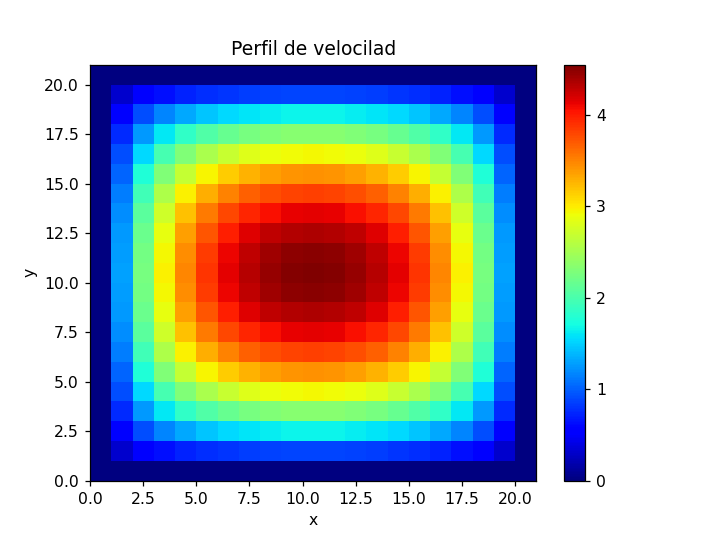

In [24]:
for k in range(1, Max_iter, 1):
    for j in range(1, No_nodes_x-1, 1):
        for i in range(1, No_nodes_y-1, 1): # w[k,j,i]
            #w[k,j,i] = (dp*Delta_x**2 * Delta_y**2 + Delta_y**2 *(w[k,j,i-1] + w[k-1,j,i+1]) + Delta_x**2 * (w[k,j-1,i] + w[k-1,j+1,i]) )  /  (2*(Delta_x**2 + Delta_y**2))
            #w[k,j,i] = 0.5*((Delta_x**2*Delta_y**2)/(Delta_x**2+Delta_y**2))*(((w[k,j,i+1]+w[k,j,i-1])/Delta_x**2)+((w[k,j,i+1]+w[k,j,i-1])/Delta_y**2)-dp)
            w[k,j,i] = (-dp*Delta_x**2 * Delta_y**2 + Delta_y**2 *(w[k,j,i-1] + w[k-1,j,i+1]) + Delta_x**2 * (w[k,j-1,i] + w[k-1,j+1,i]) )  /  (2*(Delta_x**2 + Delta_y**2))
        
    conv=np.max(w[k] - w[k-1])
    if conv < 1e-5: #Criterio de convergencia
        print('Numero de iteraciones: ', k+1 )
        print('Numero de iteraciones: ', k+1 )
        print('Convergencia : ', round(conv,6))
        print( "Velocidad máxima es de: " , np.max(w[k]) , "m/s")
        break
    if k == Max_iter-1: #Criterio de convergencia
        print('Numero de iteraciones: ', k+1 )
        print('Convergencia : ', round(conv,6))
        print( "Velocidad máxima es de: " , np.max(w[k]) , "m/s")

        #CODIGO PARAGRAFICAR

plt.title(f"Perfil de velocilad")
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh(w[k], cmap=plt.cm.jet, vmin=0, vmax=np.max(w[k]))

plt.colorbar()

In [53]:
import time

In [54]:
num_of_secs = int(input('Input number of seconds to countdown: '))

while num_of_secs:
    if num_of_secs==5:
        plt.pcolormesh(w[3], cmap=plt.cm.jet, vmin=0, vmax=np.max(w[k]))
        
    if num_of_secs==3:
        plt.pcolormesh(w[150], cmap=plt.cm.jet, vmin=0, vmax=np.max(w[k]))
            
    if num_of_secs==1:
        plt.pcolormesh(w[380], cmap=plt.cm.jet, vmin=0, vmax=np.max(w[k]))
        
    m, s = divmod(num_of_secs, 60)
    min_sec_format = '{:02d}:{:02d}'.format(m, s)
    print(min_sec_format, end=' ')
    time.sleep(1)
        
        
    num_of_secs -= 1
        
print('Countdown finished.')
countdown(num_of_secs)

Input number of seconds to countdown: 10
00:10 00:09 00:08 00:07 00:06 00:05 00:04 00:03 00:02 00:01 Countdown finished.
Countdown finished.


In [52]:
num_of_secs

0

In [39]:
w[999,10,10]

0.0

In [ ]:
# Axuliars ecuations:
#w[k,j,i] = (dp*Delta_x**2 * Delta_y**2 + Delta_y**2 *(w[k,j,i-1] + w[k-1,j,i+1]) + Delta_x**2 * (w[k,j-1,i] + w[k-1,j+1,i]) )  /  (2*(Delta_x**2 + Delta_y**2))
w[k,j,i] = 0.5*((Delta_x**2*Delta_y**2)/(Delta_x**2+Delta_y**2))*(((w[k,j,i+1]+w[k,j,i-1])/Delta_x**2)+((w[k,j,i+1]+w[k,j,i-1])/Delta_y**2)-dp)
#w[k,j,i] = (-dp*Delta_x**2 * Delta_y**2 + Delta_y**2 *(w[k,j,i-1] + w[k-1,j,i+1]) + Delta_x**2 * (w[k,j-1,i] + w[k-1,j+1,i]) )  /  (2*(Delta_x**2 + Delta_y**2))

In [6]:
x1=(input("hola "))
widgets.Button(description = 'SOLVE')
interact(x='i')


hola 45


In [23]:
widgets.IntSlider()

IntSlider(value=0)